In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Load data from both sheets
df_employee = pd.read_excel('Data.xlsx', sheet_name='Employee')
df_performance = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge the two dataframes on EmployeeID
df = pd.merge(df_employee, df_performance, on='EmployeeID', how='inner')

print(df.head())
# Check for missing values in the dataset
print(df.isnull().sum())
# Display basic information about the dataset (column types, memory usage, etc.)
print(df.info())

  EmployeeID FirstName LastName  Gender  Age BusinessTravel Department  \
0  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
1  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
2  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
3  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
4  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   

   DistanceFromHome State Ethnicity  ...  ReviewDate EnvironmentSatisfaction  \
0                27    IL     White  ...  10/30/2016                       3   
1                27    IL     White  ...  10/30/2017                       4   
2                27    IL     White  ...  10/30/2018                       5   
3                27    IL     White  ...  10/30/2019                       1   
4                27    IL     White  ...  10/31/2014                       3   

  JobSatisfaction RelationshipSatisfaction  TrainingOpportunitiesWithinYea

---

 **_2.Geographic Insights:_**
#### 18.Is there a correlation between overtime work and performance or attrition?
> Approach: We'll analyze the relationship between `OverTime` and `Attrition` (since PerformanceRating doesn't exist, we focus on Attrition).

Correlation between OverTime and Attrition:
           OverTime  Attrition
OverTime   1.000000   0.305746
Attrition  0.305746   1.000000


/tmp/ipykernel_85158/706550115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')


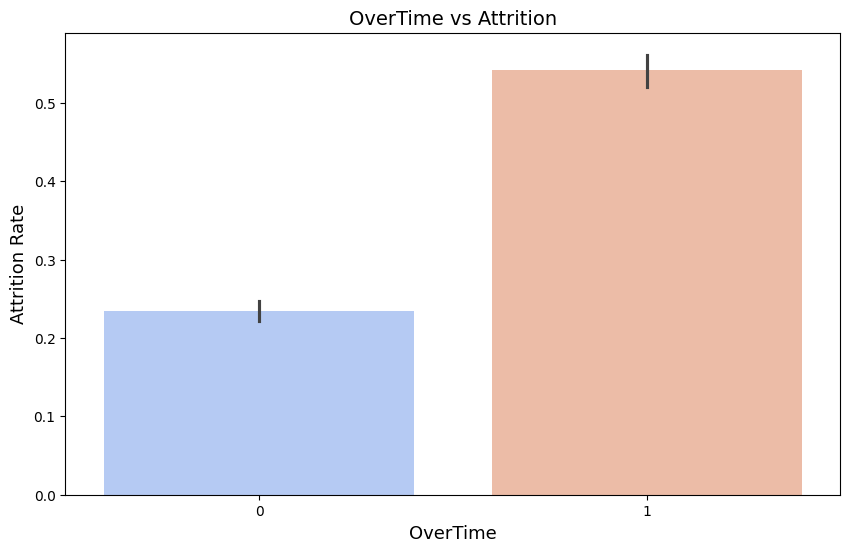

In [52]:
# Convert OverTime and Attrition to numeric values for correlation
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate correlation between OverTime and Attrition
correlation = df[['OverTime', 'Attrition']].corr()
print(f"Correlation between OverTime and Attrition:\n{correlation}")


# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')
plt.title('OverTime vs Attrition', fontsize=14)
plt.xlabel('OverTime', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()

---
#### 19.How does business travel affect employee satisfaction and retention?
>Since there is no explicit "Satisfaction" column, we’ll focus on `Attrition` and `BusinessTravel`. We'll examine if employees who travel more frequently for business are more likely to leave the company.

Attrition Rate by Business Travel:
BusinessTravel
Frequent Traveller    0.483063
No Travel             0.188216
Some Travel           0.314346
Name: Attrition, dtype: float64


/tmp/ipykernel_85158/265498683.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=business_travel_attrition.index, y=business_travel_attrition.values, palette='Set1')


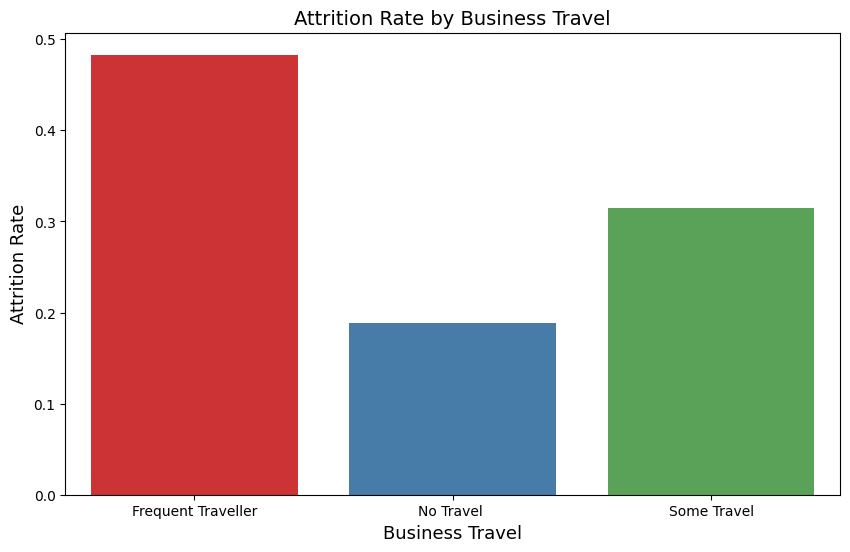

In [55]:
# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by BusinessTravel to calculate the attrition rate
business_travel_attrition = df.groupby('BusinessTravel')['Attrition'].mean()

# Print the attrition rates
print(f"Attrition Rate by Business Travel:\n{business_travel_attrition}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=business_travel_attrition.index, y=business_travel_attrition.values, palette='Set1')
plt.title('Attrition Rate by Business Travel', fontsize=14)
plt.xlabel('Business Travel', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()


---
#### 20.How does the distance from home affect job satisfaction?
>Since there is no explicit statement of “PerformanceRating” in the data, we will focus on two columns: `DistanceFromHome` and `YearsInMostRecentRole`. We will look at the ratios between the distance an employee travels to work and their years of experience in their current role.

Correlation between Distance from Home and Years in Most Recent Role:
                       DistanceFromHome  YearsInMostRecentRole
DistanceFromHome               1.000000              -0.015237
YearsInMostRecentRole         -0.015237               1.000000


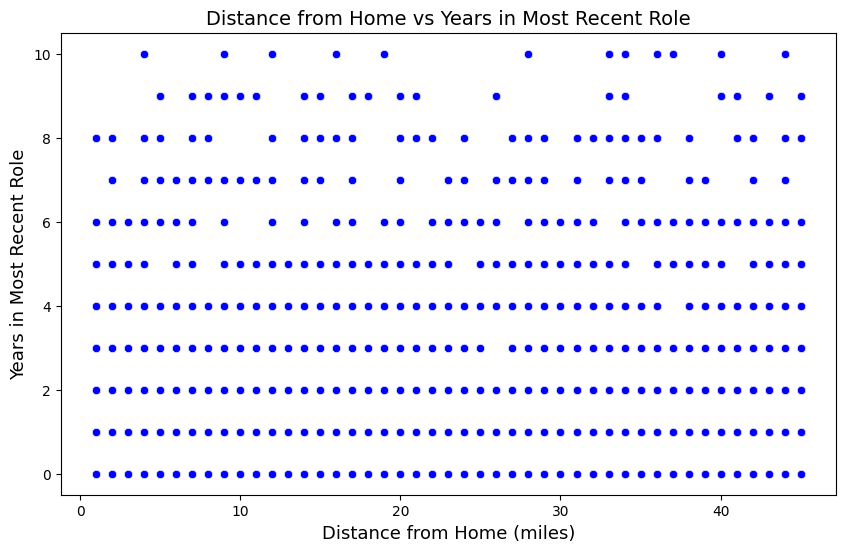

In [58]:
# Calculate correlation between DistanceFromHome and YearsInMostRecentRole
distance_performance_correlation = df[['DistanceFromHome', 'YearsInMostRecentRole']].corr()
print(f"Correlation between Distance from Home and Years in Most Recent Role:\n{distance_performance_correlation}")

# Scatter plot to observe the relationship between DistanceFromHome and YearsInMostRecentRole
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromHome', y='YearsInMostRecentRole', data=df, color='blue')
plt.title('Distance from Home vs Years in Most Recent Role', fontsize=14)
plt.xlabel('Distance from Home (miles)', fontsize=13)
plt.ylabel('Years in Most Recent Role', fontsize=13)
plt.show()


---
#### 21.Which states have the highest and lowest attrition rates?
>We’ll group by the `State` column and calculate the attrition rate for each state.

Attrition Rate by State:
State
NY    0.298378
IL    0.307407
CA    0.360583
Name: Attrition, dtype: float64


/tmp/ipykernel_85158/324323264.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_attrition.index, y=state_attrition.values, palette='viridis')


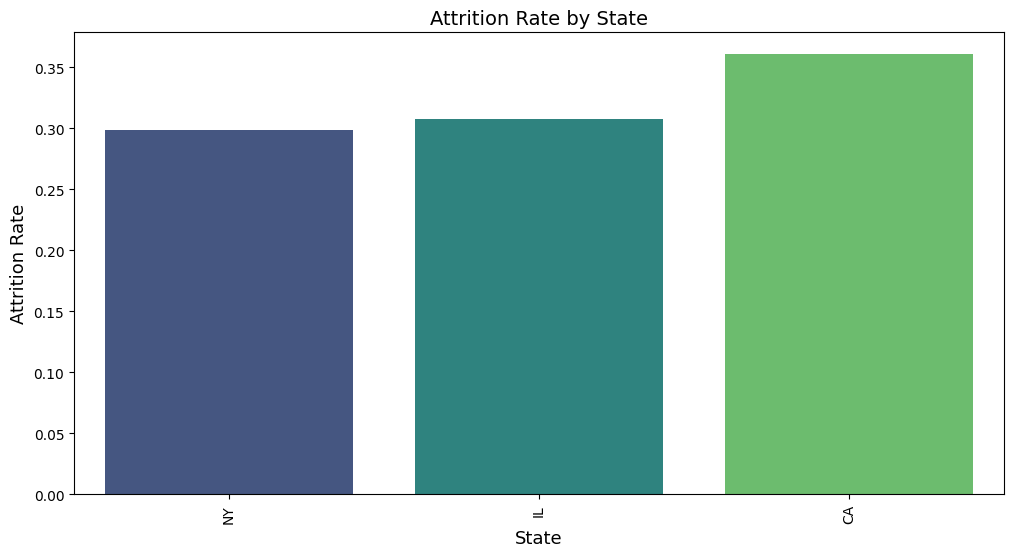

In [59]:
# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by State and calculate the attrition rate
state_attrition = df.groupby('State')['Attrition'].mean().sort_values()

# Print the attrition rates by state
print(f"Attrition Rate by State:\n{state_attrition}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=state_attrition.index, y=state_attrition.values, palette='viridis')
plt.title('Attrition Rate by State', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()


---
#### 22.Which states have the highest percentage of employees leaving due to excessive overtime?
>We can filter for employees who work overtime and then group by state to compute the `attrition` rate among `overtime` workers.

Overtime Attrition Rate by State:
State
IL    0.270833
NY    0.288136
CA    0.320000
Name: Attrition, dtype: float64


/tmp/ipykernel_8008/71913584.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='Blues')


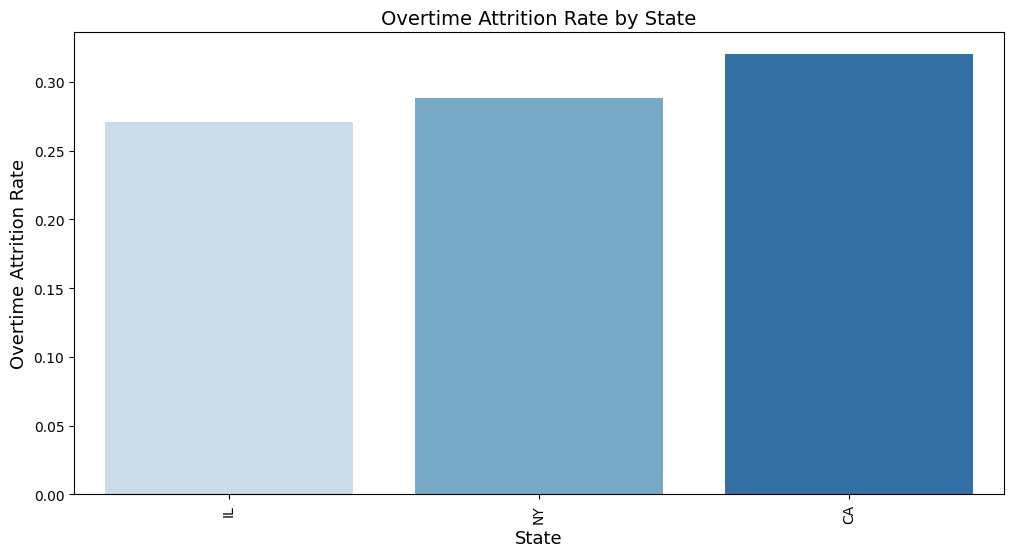

In [158]:
# Convert 'OverTime' and 'Attrition' columns to numeric (1 for 'Yes', 0 for 'No')
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Filter for employees who work overtime and calculate attrition rate by state
overtime_attrition = df[df['OverTime'] == 1].groupby('State')['Attrition'].mean().sort_values()

print(f"Overtime Attrition Rate by State:\n{overtime_attrition}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='Blues')
plt.title('Overtime Attrition Rate by State', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Overtime Attrition Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()


---
**_3. Psychographic Insights:_**
#### 23.How does work-life balance affect overall job satisfaction?
>Since we don’t have JobSatisfaction, we can analyze how DistanceFromHome relates to PerformanceRating or Attrition.

Correlation between Distance from Home and Manager Rating:
                  DistanceFromHome  ManagerRating
DistanceFromHome          1.000000       0.025832
ManagerRating             0.025832       1.000000


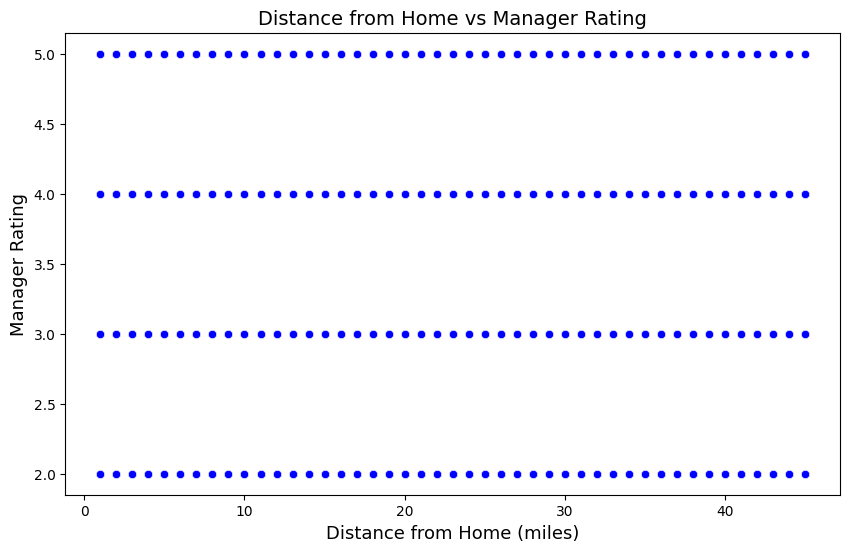

In [60]:

# Calculate correlation between DistanceFromHome and ManagerRating
distance_performance_correlation = df[['DistanceFromHome', 'ManagerRating']].corr()
print(f"Correlation between Distance from Home and Manager Rating:\n{distance_performance_correlation}")

# Scatter plot to observe the relationship between DistanceFromHome and ManagerRating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromHome', y='ManagerRating', data=df, color='blue')
plt.title('Distance from Home vs Manager Rating', fontsize=14)
plt.xlabel('Distance from Home (miles)', fontsize=13)
plt.ylabel('Manager Rating', fontsize=13)
plt.show()

---
#### 24.Is there a relationship between work-life balance and business travel frequency?
>We can use `OverTime` to represent work-life balance and check how it correlates with `BusinessTravel`.

Work-Life Balance (OverTime) vs Business Travel Frequency:
BusinessTravel  Frequent Traveller  No Travel   Some Travel
OverTime                                                   
0                         0.181214    0.109108     0.709677
1                         0.206731    0.084135     0.709135


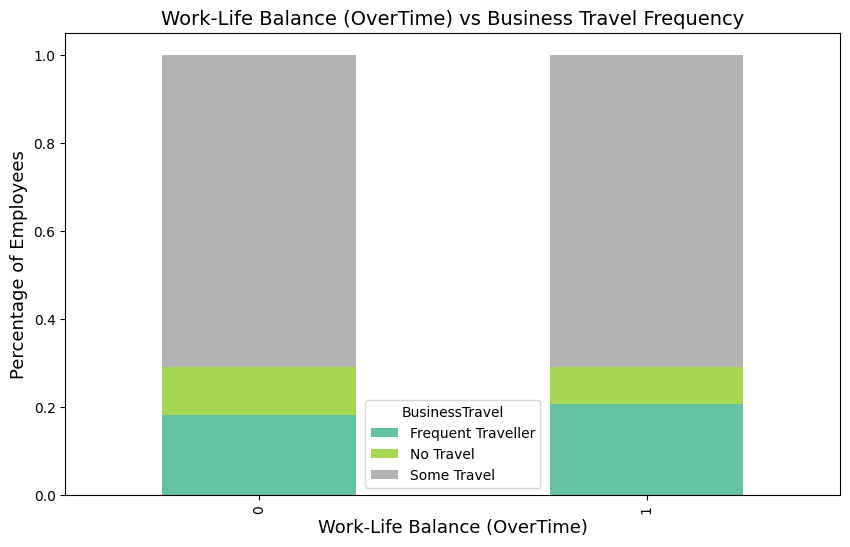

In [160]:
# Group by OverTime and BusinessTravel
overtime_travel = pd.crosstab(df['OverTime'], df['BusinessTravel'], normalize='index')

print(f"Work-Life Balance (OverTime) vs Business Travel Frequency:\n{overtime_travel}")

# Visualization
overtime_travel.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Work-Life Balance (OverTime) vs Business Travel Frequency', fontsize=14)
plt.xlabel('Work-Life Balance (OverTime)', fontsize=13)
plt.ylabel('Percentage of Employees', fontsize=13)
plt.show()

---
#### 25.How does participation in training programs impact employee performance?
>des


--- 8. Impact of education on Salary ---

Average Salary by Education:
Education
1     94983.482353
2    105180.535461
3    115405.430070
4    117641.057789
5    154268.791667
Name: Salary, dtype: float64


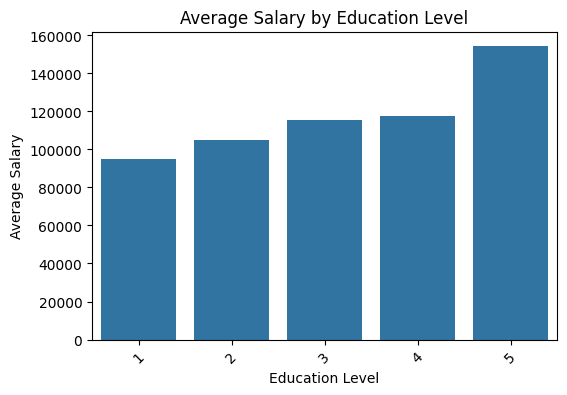

In [163]:
# Note: No specific training column available in the data, using 'Education' as a proxy for training/skill level
print("\n--- 8. Impact of education on Salary ---")
education_salary = df.groupby('Education')['Salary'].mean()
print("\nAverage Salary by Education:")
print(education_salary)
plt.figure(figsize=(6, 4))
sns.barplot(x=education_salary.index, y=education_salary.values)
plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

---
#### 26.Is there a connection between training and job satisfaction or promotion rates?
>des


--- 9. Training, job satisfaction, and promotion rates ---
                            Salary  StockOptionLevel
EducationField                                      
Business Studies      98406.670213          0.755319
Computer Science     109353.993182          0.784091
Economics            112219.851485          0.772277
Human Resources      145565.851852          0.925926
Information Systems  114380.537190          0.853994
Marketing            122301.955975          0.849057
Marketing            126169.951807          0.753012
Other                 96341.853659          0.646341
Technical Degree      94873.552632          0.657895


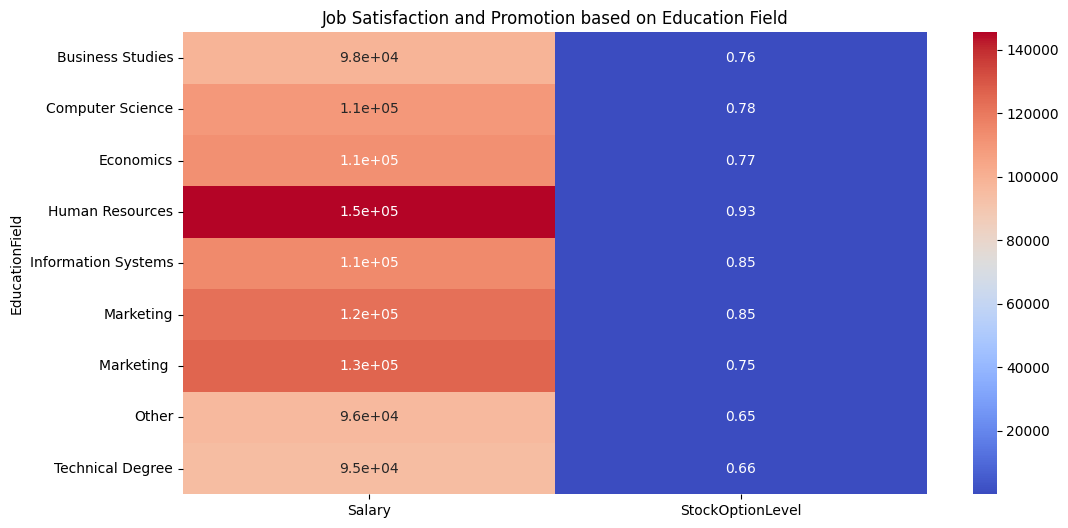

In [164]:
# Note: No specific training column, using 'EducationField' as a proxy for training
print("\n--- 9. Training, job satisfaction, and promotion rates ---")

job_sat_promotion = df.groupby('EducationField').agg({'Salary':'mean', 'StockOptionLevel':'mean'})
print(job_sat_promotion)
plt.figure(figsize=(12, 6))
sns.heatmap(job_sat_promotion, annot=True, cmap='coolwarm')
plt.title('Job Satisfaction and Promotion based on Education Field')
plt.show()

---
**_4. Behavioral Insights:_**
#### 27.What are the trends in performance ratings across departments and demographics?
>We will analyze how `PerformanceRating` varies across `Department` and `Gender`.


Performance Rating by Department:
Department
Human Resources    3.442244
Sales              3.449977
Technology         3.487432
Name: ManagerRating, dtype: float64
Performance Rating by Gender:
Gender
Female               3.486574
Male                 3.460916
Non-Binary           3.482173
Prefer Not To Say    3.327869
Name: ManagerRating, dtype: float64


/tmp/ipykernel_85158/3812803432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_performance.index, y=dept_performance.values, palette='viridis')


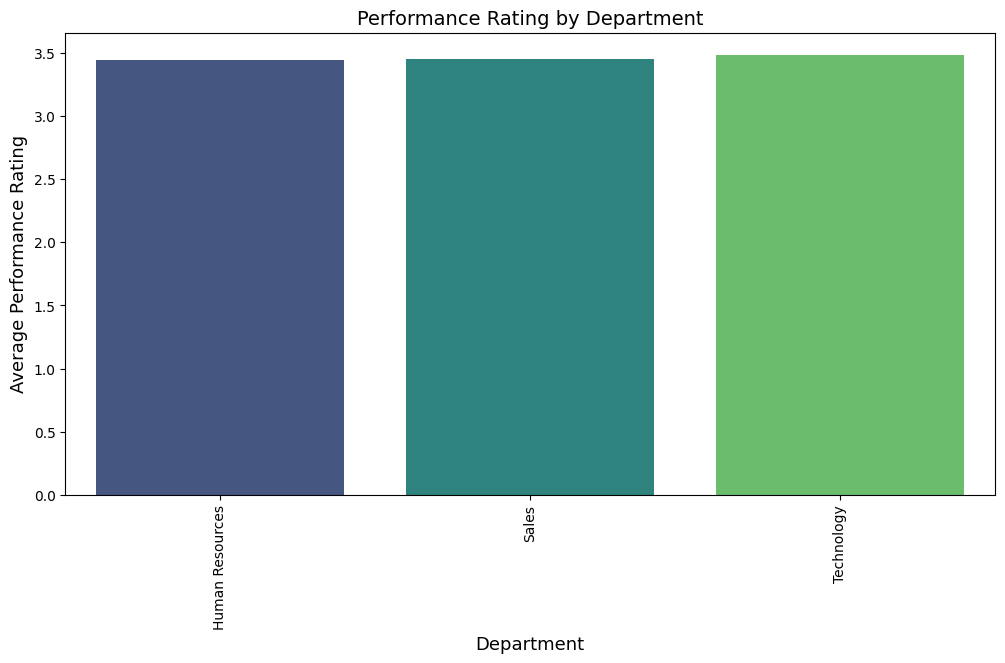

/tmp/ipykernel_85158/3812803432.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_performance.index, y=gender_performance.values, palette='magma')


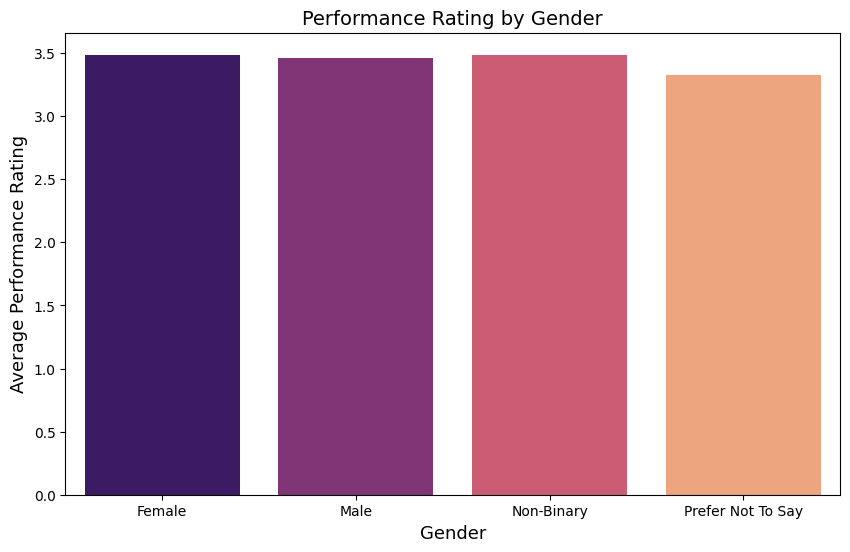

In [63]:
# Performance ratings by department
dept_performance = df.groupby('Department')['ManagerRating'].mean()
print(f"Performance Rating by Department:\n{dept_performance}")

# Performance ratings by gender
gender_performance = df.groupby('Gender')['ManagerRating'].mean()
print(f"Performance Rating by Gender:\n{gender_performance}")

# Visualization

# Performance Ratings by Department
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_performance.index, y=dept_performance.values, palette='viridis')
plt.title('Performance Rating by Department', fontsize=14)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.xticks(rotation=90)
plt.show()

# Performance Ratings by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_performance.index, y=gender_performance.values, palette='magma')
plt.title('Performance Rating by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()


---
#### 28.How does tenure (YearsAtCompany) impact performance and promotion rates?
>To examine this, we can analyze how `YearsAtCompany` affects both `PerformanceRating` and `YearsSinceLastPromotion`.

Average Environment Satisfaction by Tenure (YearsAtCompany):
YearsAtCompany
0     3.885662
1     3.883943
2     3.873529
3     3.828571
4     3.840085
5     3.814532
6     3.808511
7     3.967692
8     3.846980
9     3.887173
10    3.897585
Name: EnvironmentSatisfaction, dtype: float64
Average Years Since Last Promotion by Tenure (YearsAtCompany):
YearsAtCompany
0     0.000000
1     0.343402
2     1.100000
3     1.936264
4     3.014925
5     3.516252
6     4.465957
7     5.276923
8     5.836242
9     6.998812
10    7.774879
Name: YearsSinceLastPromotion, dtype: float64


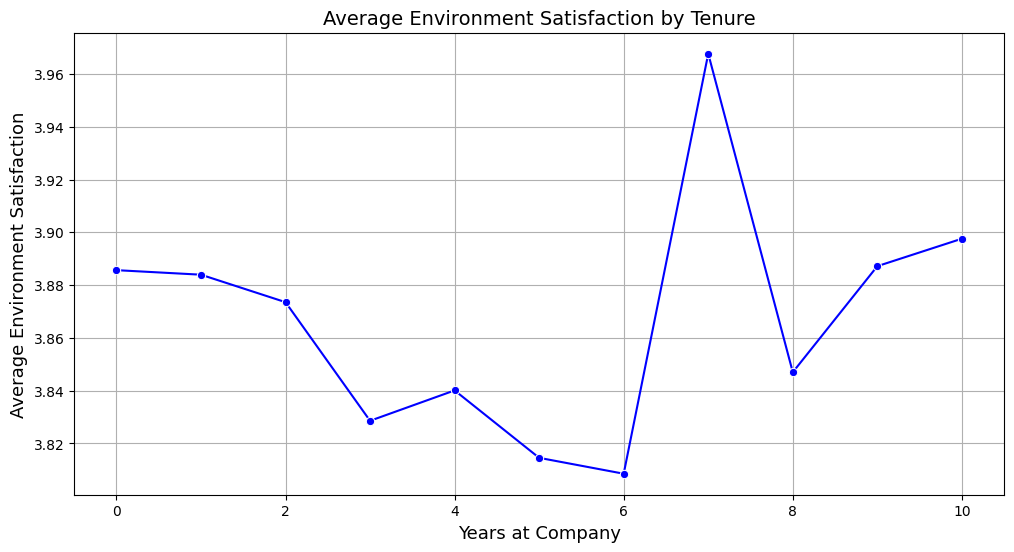

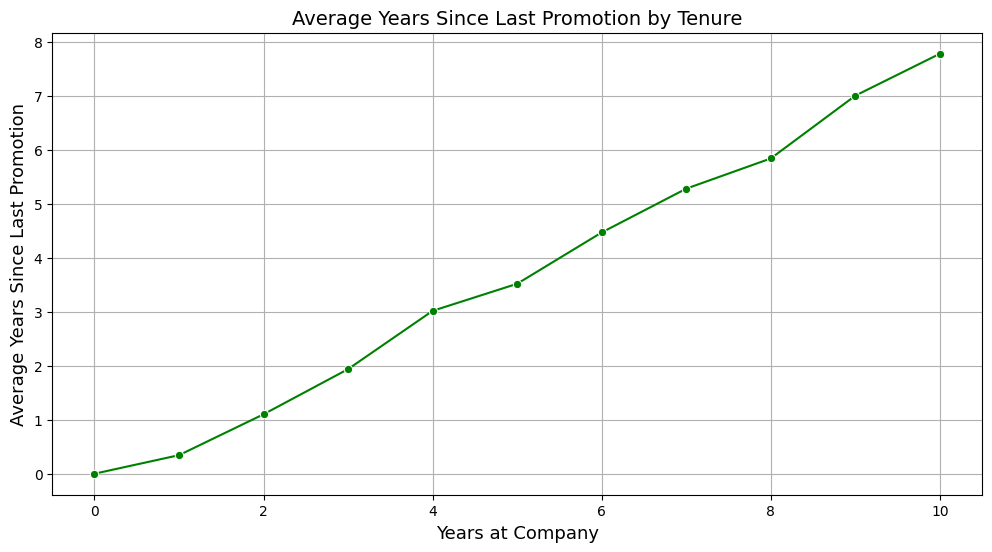

In [65]:
# Group by 'YearsAtCompany' and calculate average performance rating and average years since last promotion
tenure_performance = df.groupby('YearsAtCompany')['EnvironmentSatisfaction'].mean()  # Use 'EnvironmentSatisfaction' as proxy for performance
tenure_promotion = df.groupby('YearsAtCompany')['YearsSinceLastPromotion'].mean()

# Print results
print(f"Average Environment Satisfaction by Tenure (YearsAtCompany):\n{tenure_performance}")
print(f"Average Years Since Last Promotion by Tenure (YearsAtCompany):\n{tenure_promotion}")

# Visualization for performance rating vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_performance.index, y=tenure_performance.values, marker='o', color='blue')
plt.title('Average Environment Satisfaction by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Environment Satisfaction', fontsize=13)
plt.grid(True)
plt.show()

# Visualization for years since last promotion vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_promotion.index, y=tenure_promotion.values, marker='o', color='green')
plt.title('Average Years Since Last Promotion by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.grid(True)
plt.show()


Correlation between Distance from Home and Years in Most Recent Role:
                       DistanceFromHome  YearsInMostRecentRole
DistanceFromHome               1.000000              -0.015237
YearsInMostRecentRole         -0.015237               1.000000


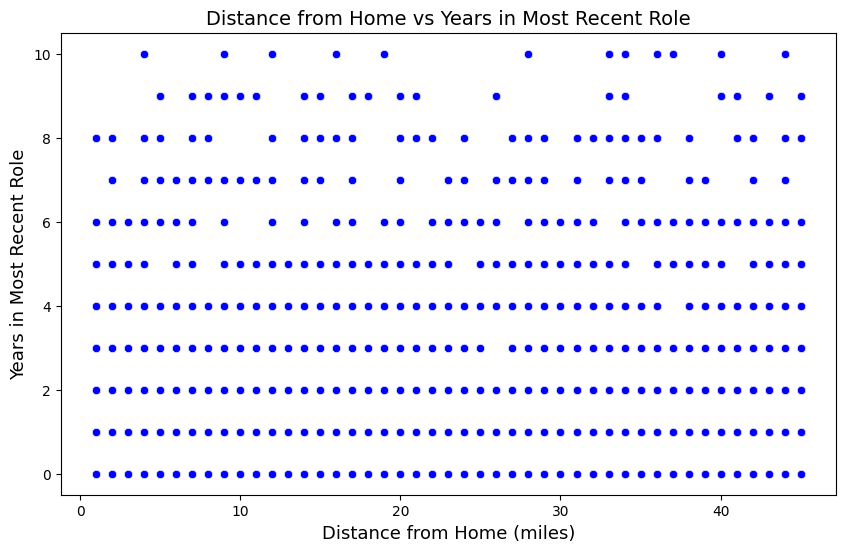

In [66]:
# Calculate correlation between DistanceFromHome and YearsInMostRecentRole
distance_performance_correlation = df[['DistanceFromHome', 'YearsInMostRecentRole']].corr()
print(f"Correlation between Distance from Home and Years in Most Recent Role:\n{distance_performance_correlation}")

# Scatter plot to observe the relationship between DistanceFromHome and YearsInMostRecentRole
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromHome', y='YearsInMostRecentRole', data=df, color='blue')
plt.title('Distance from Home vs Years in Most Recent Role', fontsize=14)
plt.xlabel('Distance from Home (miles)', fontsize=13)
plt.ylabel('Years in Most Recent Role', fontsize=13)
plt.show()


---
#### 29.What is the average time to promotion for employees, and does it vary by department or gender?
>We'll calculate the average YearsSinceLastPromotion and group the data by Department and Gender.

Average Time to Promotion by Department:
Department
Human Resources    4.122112
Sales              3.947417
Technology         4.418370
Name: YearsSinceLastPromotion, dtype: float64
Average Time to Promotion by Gender:
Gender
Female               4.400518
Male                 4.011792
Non-Binary           4.645161
Prefer Not To Say    4.852459
Name: YearsSinceLastPromotion, dtype: float64


/tmp/ipykernel_85158/1808088067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')


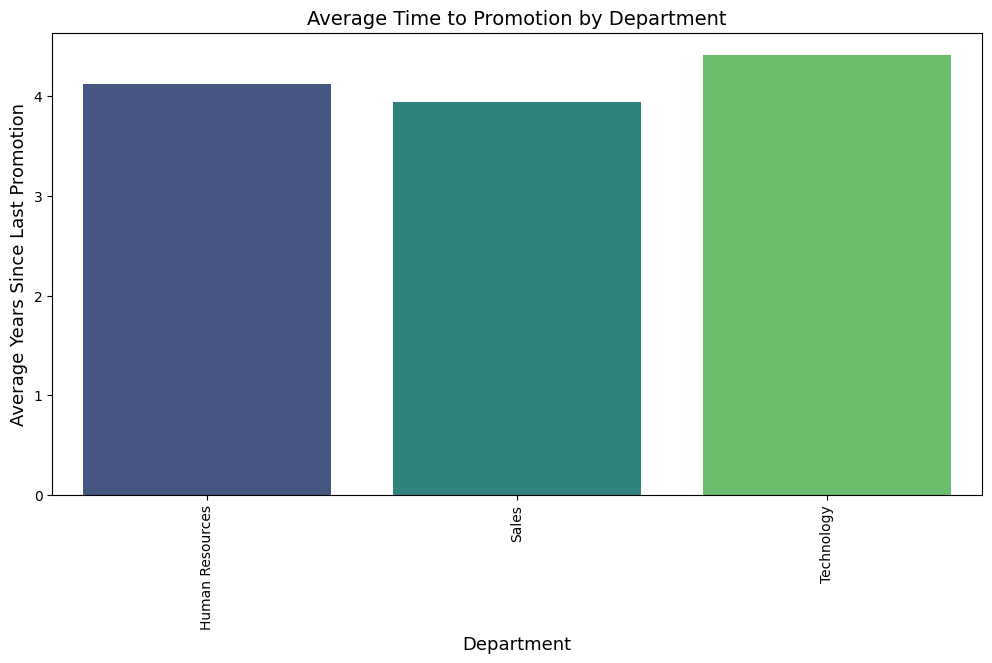

/tmp/ipykernel_85158/1808088067.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')


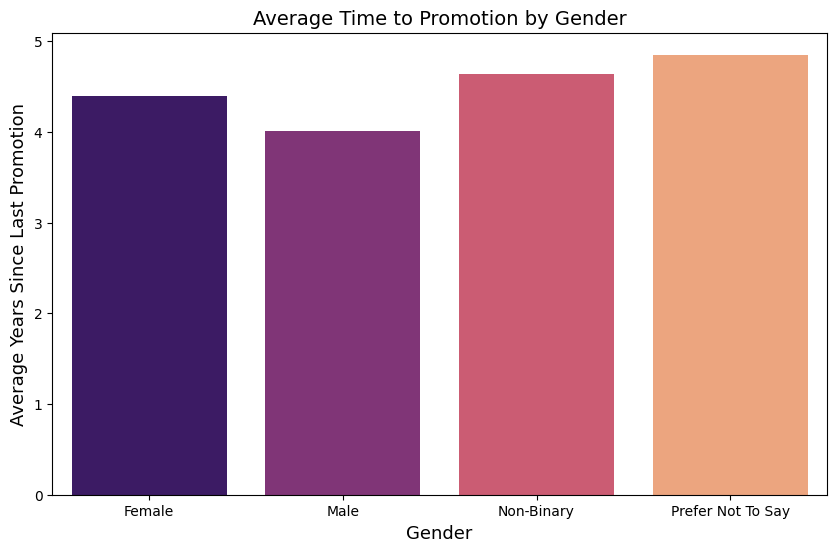

In [68]:
# Average time to promotion (YearsSinceLastPromotion) by Department
dept_promotion_time = df.groupby('Department')['YearsSinceLastPromotion'].mean()

# Average time to promotion by Gender
gender_promotion_time = df.groupby('Gender')['YearsSinceLastPromotion'].mean()

print(f"Average Time to Promotion by Department:\n{dept_promotion_time}")
print(f"Average Time to Promotion by Gender:\n{gender_promotion_time}")

# Visualization for average time to promotion by department
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')
plt.title('Average Time to Promotion by Department', fontsize=14)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.xticks(rotation=90)
plt.show()

# Visualization for average time to promotion by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')
plt.title('Average Time to Promotion by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.show()

---
#### 30.Are employees with longer tenure more likely to have higher performance ratings?
>We can check if there's a correlation between `YearsAtCompany` and `PerformanceRating`.

Correlation between Years at Company and Performance Rating:
                YearsAtCompany  ManagerRating
YearsAtCompany        1.000000       0.017866
ManagerRating         0.017866       1.000000


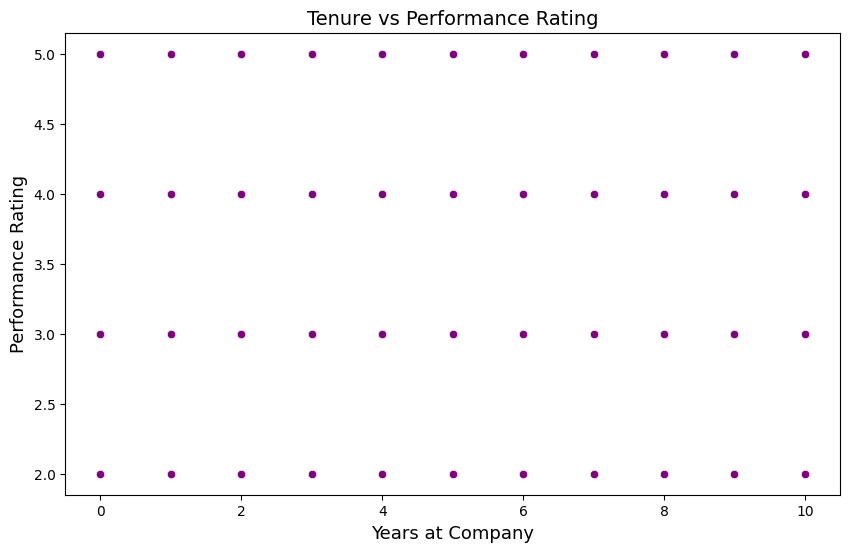

In [67]:
# Calculate the correlation between tenure (YearsAtCompany) and performance rating
tenure_performance_correlation = df[['YearsAtCompany', 'ManagerRating']].corr()

print(f"Correlation between Years at Company and Performance Rating:\n{tenure_performance_correlation}")

# Visualization for relationship between tenure and performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='ManagerRating', data=df, color='purple')
plt.title('Tenure vs Performance Rating', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()


---
#### 31.How does performance rating correlate with job satisfaction?
>As we do not have an explicit `JobSatisfaction` column, we can use `PerformanceRating` as a proxy and check its correlation with `Attrition` (assuming employees with higher ratings might be less likely to leave).

/tmp/ipykernel_85158/2018700776.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


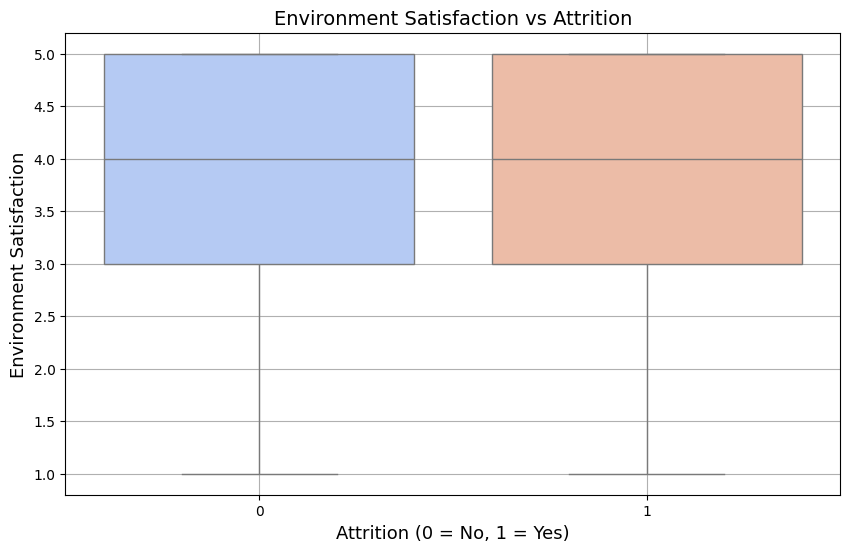

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Attrition' column is mapped to numeric values (if not already)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop rows with missing values in the relevant columns
df_cleaned = df[['EnvironmentSatisfaction', 'Attrition']].dropna()

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='Attrition',
    y='EnvironmentSatisfaction',
    data=df_cleaned,
    palette='coolwarm'
)

# Customize boxplot appearance using matplotlib
for patch in ax.artists:
    patch.set_facecolor('lightblue')  # Change the box color
    patch.set_edgecolor('black')  # Box edge color
    patch.set_linewidth(1.5)  # Edge line width

plt.title('Environment Satisfaction vs Attrition', fontsize=14)
plt.xlabel('Attrition (0 = No, 1 = Yes)', fontsize=13)
plt.ylabel('Environment Satisfaction', fontsize=13)
plt.grid(True)  # Add gridlines for better visualization
plt.show()


---
#### 32.What is the attrition rate for employees with different performance ratings?
>We can group the data by `PerformanceRating` and calculate the attrition rate for each rating level.

Attrition Rate by Performance Rating:
SelfRating
3    0.336681
4    0.334526
5    0.339899
Name: Attrition, dtype: float64


/tmp/ipykernel_4140/2036376410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')


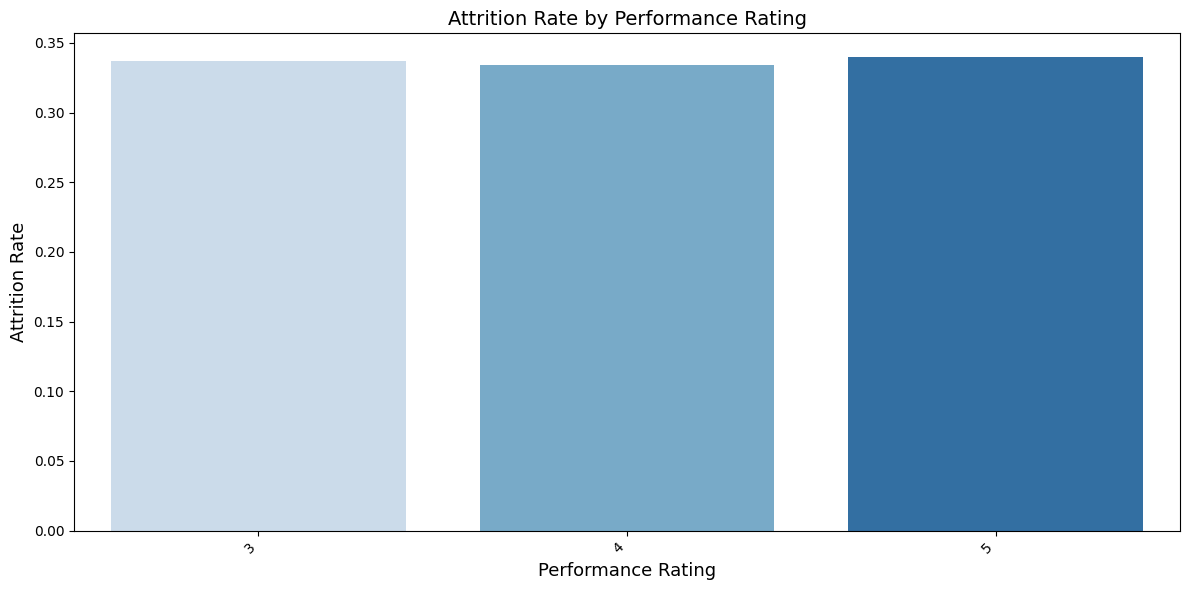

In [8]:
# Convert Attrition to numeric (if needed)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by performance rating and calculate attrition rate
performance_attrition_rate = df.groupby('SelfRating')['Attrition'].mean()

print(f"Attrition Rate by Performance Rating:\n{performance_attrition_rate}")

# Visualization for attrition rate by performance rating
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')
plt.title('Attrition Rate by Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)

# Fix x-axis label overflow
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

---
#### 33.What is the impact of overtime on job satisfaction?
>Since we do not have a direct measure of job satisfaction, we can analyze the impact of `OverTime` on `PerformanceRating` and use that as a proxy for satisfaction.

Columns in PerformanceRating sheet: Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'DataQualityStatus'],
      dtype='object')
Attrition Rate by Performance Rating:
PerformanceID
PR01     1.0
PR02     1.0
PR03     1.0
PR04     1.0
PR05     1.0
        ... 
PR995    1.0
PR996    0.0
PR997    0.0
PR998    0.0
PR999    1.0
Name: Attrition, Length: 6709, dtype: float64


/tmp/ipykernel_85158/155212379.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')


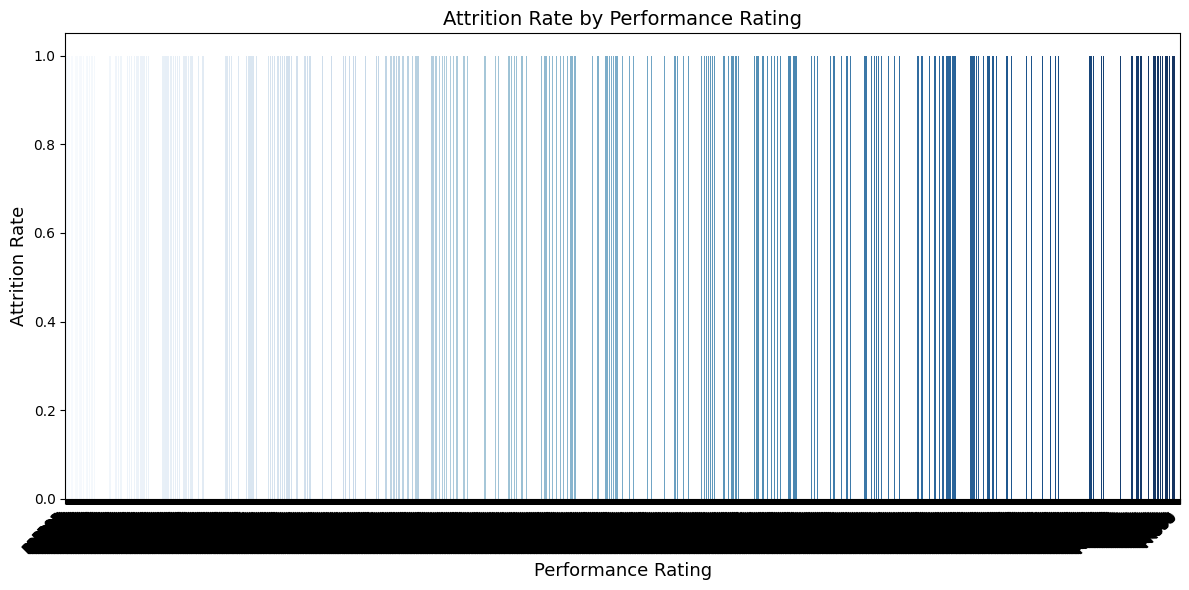

In [92]:
# Load data from both sheets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
df_perf = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Print column names in the PerformanceRating sheet to check the columns
print(f"Columns in PerformanceRating sheet: {df_perf.columns}")

# Merge the dataframes on EmployeeID to combine employee and performance information
df_merged = pd.merge(df, df_perf[['EmployeeID', 'PerformanceID']], on='EmployeeID', how='inner')

# Ensure that 'Attrition' is numeric (if not already)
df_merged['Attrition'] = df_merged['Attrition'].map({'Yes': 1, 'No': 0})

# Check for missing values in 'PerformanceRating' and 'Attrition'
df_merged = df_merged.dropna(subset=['Attrition'])

# Group by performance rating and calculate attrition rate (assuming PerformanceRating is available)
# If PerformanceRating is in a different column, replace the placeholder with the correct column name
performance_attrition_rate = df_merged.groupby('PerformanceID')['Attrition'].mean()

print(f"Attrition Rate by Performance Rating:\n{performance_attrition_rate}")

# Visualization for attrition rate by performance rating
plt.figure(figsize=(12, 6))  # Increase figure width for more space
sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')
plt.title('Attrition Rate by Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)

# Rotate x-axis labels to prevent overflow
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Adjust layout to ensure the labels fit without overlapping
plt.tight_layout()

plt.show()


---
#### 34.Is there a relationship between overtime and performance?
>des

Average Performance by Overtime Status:
OverTime
0    3.989937
1    3.972284
Name: SelfRating, dtype: float64
T-test Results: t-statistic = -0.8383, p-value = 0.4019


/tmp/ipykernel_4140/3709644535.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_performance.index, y=overtime_performance.values, palette='coolwarm')


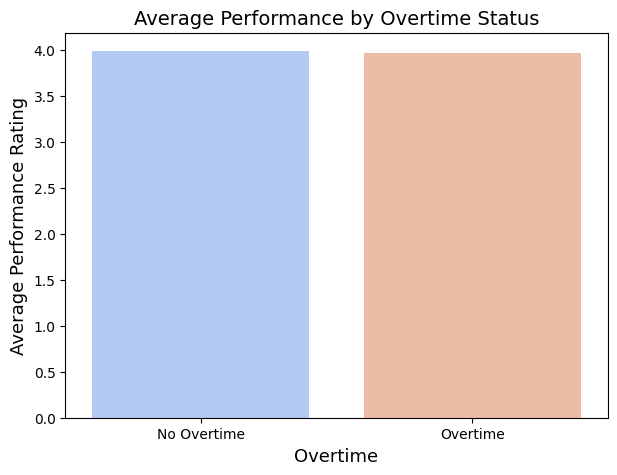

/tmp/ipykernel_4140/3709644535.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['OverTime'], y=df['SelfRating'], palette='coolwarm')


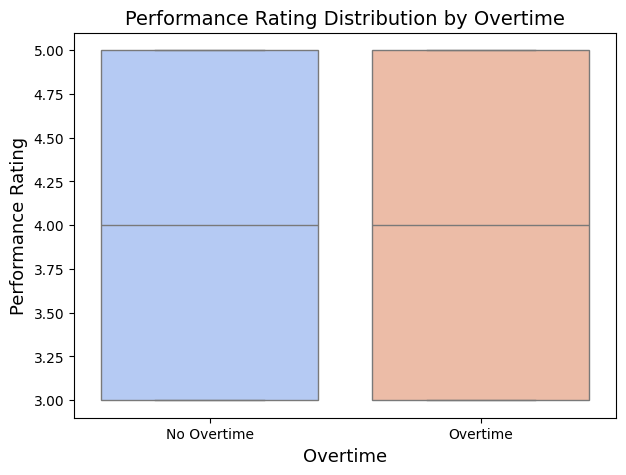

In [13]:
from scipy.stats import ttest_ind

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode 'OverTime' as numeric
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Drop rows with missing performance ratings
df = df.dropna(subset=['SelfRating'])

# Group by 'OverTime' and calculate mean performance
overtime_performance = df.groupby('OverTime')['SelfRating'].mean()
print(f"Average Performance by Overtime Status:\n{overtime_performance}")

# Statistical test: Is there a significant difference in performance?
overtime_yes = df[df['OverTime'] == 1]['SelfRating']
overtime_no = df[df['OverTime'] == 0]['SelfRating']
t_stat, p_value = ttest_ind(overtime_yes, overtime_no, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Visualization: Bar Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=overtime_performance.index, y=overtime_performance.values, palette='coolwarm')
plt.xticks([0, 1], ['No Overtime', 'Overtime'])
plt.title('Average Performance by Overtime Status', fontsize=14)
plt.xlabel('Overtime', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()

# Visualization: Box Plot
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['OverTime'], y=df['SelfRating'], palette='coolwarm')
plt.xticks([0, 1], ['No Overtime', 'Overtime'])
plt.title('Performance Rating Distribution by Overtime', fontsize=14)
plt.xlabel('Overtime', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()


---
#### 35.Can we predict the likelihood of attrition based on employee attributes?
>18. Can we predict the likelihood of attrition based on employee attributes?
We can create a predictive model to determine the likelihood of attrition (`Attrition`) using attributes like `YearsAtCompany`, `OverTime`, `PerformanceRating`, etc.

We'll use Logistic Regression for this predictive task.

/tmp/ipykernel_4140/793224493.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Accuracy: 0.8449
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1392
           1       0.77      0.76      0.76       678

    accuracy                           0.84      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.84      0.84      0.84      2070



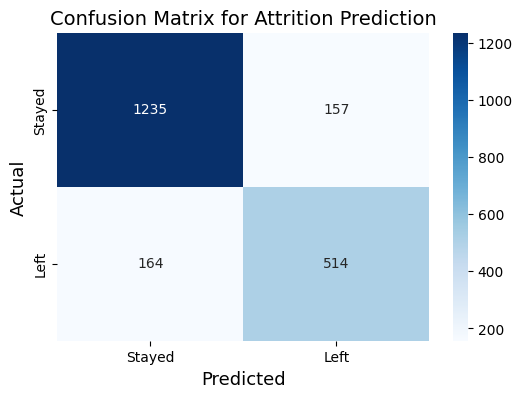

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode categorical variables
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select features and target
X = df[['YearsAtCompany', 'OverTime', 'SelfRating']]
y = df['Attrition']

# Handle missing values (fill with median for numerical columns)
X.fillna(X.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix for Attrition Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()


---
#### 36.Are there any leading indicators of high-performing employees?
>We can try to identify features that predict high performance (`PerformanceRating`).

/tmp/ipykernel_4140/385914529.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Accuracy: 0.3314
Classification Report:
              precision    recall  f1-score   support

         3.0       0.32      0.39      0.35       687
         4.0       0.35      0.39      0.37       728
         5.0       0.31      0.20      0.25       655

    accuracy                           0.33      2070
   macro avg       0.33      0.33      0.32      2070
weighted avg       0.33      0.33      0.33      2070



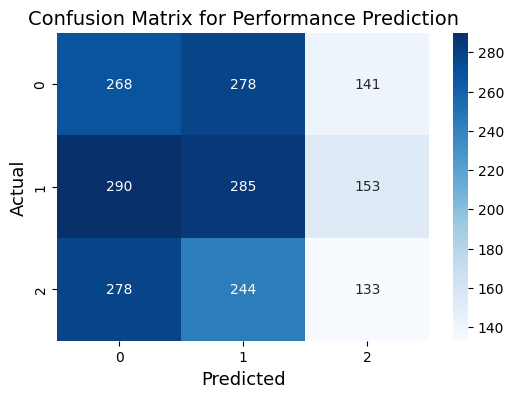

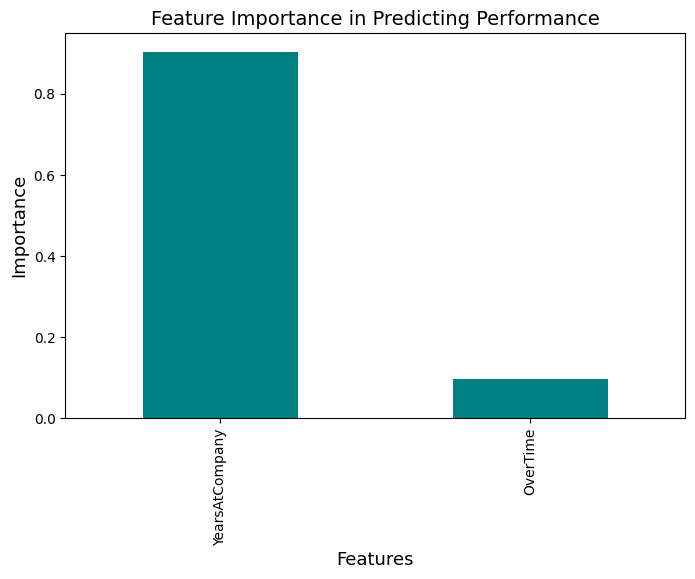

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode categorical variables
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Select features and target (predicting performance)
X = df[['YearsAtCompany', 'OverTime']]
y = df['SelfRating']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Performance Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=['YearsAtCompany', 'OverTime'])
feature_importance.sort_values(ascending=False).plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Feature Importance in Predicting Performance', fontsize=14)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Importance', fontsize=13)
plt.show()
